In [2]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

#CHECK ENV AND GPU AVAILABLE

In [3]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.6-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:05:16) 
[Clang 12.0.1 ]
Pandas 1.5.0
Scikit-Learn 1.1.2
SciPy 1.9.1
GPU is available


In [4]:
from keras.models import Sequential
from keras.layers import Dense

COURS 1

Exercice 1

Dans ce premier exercice, on veut créer un réseau de neurones séquentiel simple en utilisant
Keras.
Le réseau contient deux nombres en entrée, une couche cachée de 10 neurones et, pour finir,
un seul nombre non-contraint en sortie.
Une sortie non contrainte est obtenue en évitant de définir une fonction d'activation dans la
couche de sortie. Ceci est utile pour des problèmes de régression dont la tâche est de prédire
une quantité continue.

In [5]:
model1=Sequential()
model1.add(Dense(10, input_shape=(2,)))
model1.add(Dense(1))

Metal device set to: Apple M1


2022-10-06 12:09:08.681932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-06 12:09:08.682149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Exercice 2

Créer un nouveau modèle séquentiel de 3 couches : une couche d’entrée à 3 neurones, une
couche cachée de 5 neurones avec une fonction d’activation relu et un neurone en sortie.
1) Le réseau a combien de paramètres ? Expliquer.
2) Afficher les paramètres des deux couches denses du réseau.

In [6]:
model2=Sequential()
model2.add(Dense(5, input_shape=(3,), activation='relu'))
model2.add(Dense(1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Exercice 3

1) Initialiser les poids à 1 et les biais à 0 de la couche cachée.
2) Calculer les activations de la couche cachée et vérifier le résultat par programme pour
les deux exemples : (0.5 , 3) et (-0.75 , 1).

In [ ]:
from tensorflow.keras import initializers
import numpy as np 

#model3.add(tf.keras.Input(shape=(2,)))

model3 = keras.Sequential([layers.Dense(3, input_shape=(2,),kernel_initializer='ones',bias_initializer='zeros',activation="relu", name='hidden_layer'),
                          layers.Dense(1, name="couche_sortie")])

from keras.models import Model

hiddenLayerOutput=Model(inputs=model3.layers[0].input,outputs=model3.layers[0].output)
hiddenLayerOutput.predict([[.5,3],[-0.75,1]])

#x=tf.constant([[.5,3],[-.75,1]], dtype=tf.float64)
#model3.predict(x)

Exercice 4

L’objectif de cet exercice est de construire un modèle de régression simple pour prévoir
l’orbite d’un météore.
Les données d'apprentissage sont constituées de mesures effectuées dans l’intervalles -10
minutes avant l'impact jusqu'à +10 minutes après l’impact. Chaque pas de temps peut être vu
comme une abscisse temps dans le graphique de la figure 2, au quelle une ordonnée est
associée pour renseigner la position du météore à un instant donné.

Les données d’apprentissage sont enregistrées dans deux tableaux numpy : time.npy
représentant les caractéristiques et positions.npy contenant les sorties.
1) Créer un modèle séquentiel avec une couche dense de 50 neurones.
2) Ajouter deux autres couches denses de 50 neurones chacune avec relu comme
fonction d’activation.
3) Ajouter la couche de sortie et définir ses paramètres.
4) Configurer le modèle d’apprentissage en utilisant l’optimisateur adam et l’erreur
quadratique moyenne pour la minimisation d’erreur.
5) Entraîner le modèle avec 30 périodes.
6) Prédire les valeurs des positions du météore de -10 à 10 minutes.
7) Tracer la trajectoire réelle de l’orbite entre -10 et 10 minutes. Tracer la trajectoire
prédite par le modèle.

In [4]:
import numpy as np

# create a regression model
model4=Sequential()
model4.add(Dense(50, input_shape=(1,)))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mse')

X=np.load('time.npy')
y=np.load('positions.npy')

In [5]:
X.shape

(2000,)

In [7]:
model4.fit(X, y, epochs=30)

Epoch 1/30


2022-10-06 12:12:48.884395: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-06 12:12:49.068570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 5ms/step - loss: 1546.9596
Epoch 2/30
63/63 [==============================] - 0s 5ms/step - loss: 205.3162
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 131.4675
Epoch 4/30
63/63 [==============================] - 0s 5ms/step - loss: 126.1518
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 120.9535
Epoch 6/30
63/63 [==============================] - 0s 5ms/step - loss: 114.1447
Epoch 7/30
63/63 [==============================] - 0s 5ms/step - loss: 103.3980
Epoch 8/30
63/63 [==============================] - 0s 5ms/step - loss: 86.7227
Epoch 9/30
63/63 [==============================] - 0s 5ms/step - loss: 59.6165
Epoch 10/30
63/63 [==============================] - 0s 5ms/step - loss: 37.6029
Epoch 11/30
63/63 [==============================] - 0s 5ms/step - loss: 28.3508
Epoch 12/30
63/63 [==============================] - 0s 5ms/step - loss: 23.1977
Epoch 13/30
63/63 [=====================

In [8]:
X_test=np.arange(-10,11)

In [9]:
X_test

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [10]:
y_pred=model4.predict(X_test)

1/1 [==============================] - 0s 79ms/step


2022-10-06 12:17:15.324058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


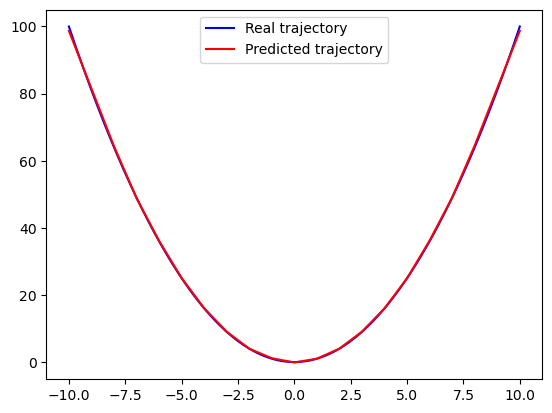

In [14]:
import matplotlib.pyplot as plt

plt.plot(X, y, color='blue')

plt.plot(X_test, y_pred, color='red')

plt.legend(['Real trajectory', 'Predicted trajectory'])